In [1]:
import tensorflow as tf

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
mnist

<module 'tensorflow.keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/tensorflow/keras/datasets/mnist/__init__.py'>

In [6]:
dir(mnist)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_sys',
 'load_data']

In [7]:
mdata = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
print(mdata) #앞에있는 것은 숫자로 표현된 이미지 6만개 뒤에있는 거는 정답

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [12]:
len(mdata) #train(학습데이터), test(테스트 데이터)

2

In [14]:
len(mdata[0]) #x, y data 2개

2

In [15]:
len(mdata[1])

2

In [16]:
len(mdata[0][0])

60000

In [18]:
type(mdata[0][0])

numpy.ndarray

In [19]:
img = mdata[0][0][0]
print(mdata[0][1][0])

5


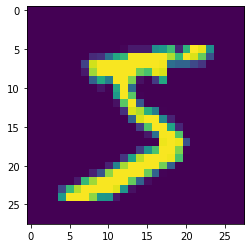

In [21]:
plt.imshow(img)

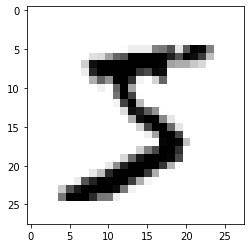

In [22]:
plt.imshow(img, cmap = plt.cm.binary)

In [24]:
def show_num(img, tag):
    plt.imshow(img, cmap = plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('tag : ' + str(tag), size=40)
    plt.show()

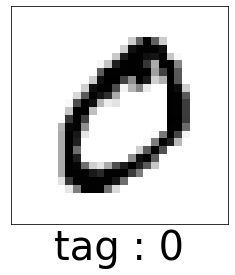

In [28]:
imgtwo = mdata[0][0][1]
tag = mdata[0][1][1]
show_num(imgtwo, tag)

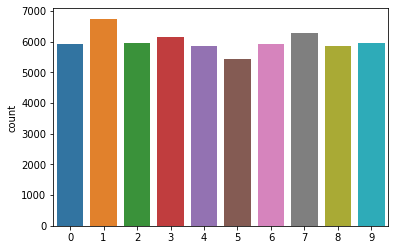

In [29]:
sns.countplot(mdata[0][1])

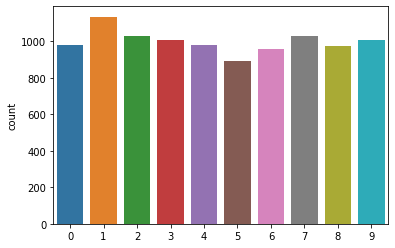

In [30]:
sns.countplot(mdata[1][1])

In [31]:
(x_train, y_train), (x_test, y_test) = mdata

In [33]:
print(len(x_train))
print(len(x_test))

60000
10000


In [34]:
x_train[0].max()

255

In [36]:
x_train[0].min()

0

In [37]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [39]:
x_train[0].max()

1.0

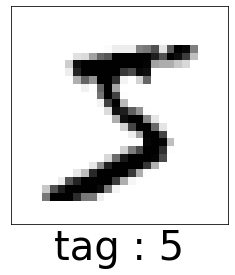

In [40]:
show_num(x_train[0], y_train[0])

In [43]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # layers : 신경망을 층층히 많이 쌓아논 것, input_shape(몇픽셀인가)
    tf.keras.layers.Dense(128, activation='relu'), 
    tf.keras.layers.Dropout(0.2), # 학습할 때 과몰입하지 않기 위해 0.2만큼 여유를 두겠다
    tf.keras.layers.Dense(10, activation='softmax')
])

In [45]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy']) 

In [47]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1471 - accuracy: 0.9567
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1098 - accuracy: 0.9666
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0897 - accuracy: 0.9720
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0765 - accuracy: 0.9762
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0689 - accuracy: 0.9777


In [48]:
model.evaluate(x_test, y_test, verbose = 2)

313/313 - 0s - loss: 0.0713 - accuracy: 0.9793


[0.07133504003286362, 0.9793000221252441]

In [49]:
model.predict(x_test)

array([[5.95365035e-10, 1.00411768e-09, 2.76588116e-06, ...,
        9.99448597e-01, 1.77795485e-08, 3.06369366e-05],
       [2.29076735e-09, 9.41769977e-05, 9.99902368e-01, ...,
        3.23939365e-15, 8.84019826e-08, 1.28720963e-16],
       [2.75708976e-06, 9.97376561e-01, 3.81674792e-04, ...,
        1.52521709e-03, 6.28625450e-04, 8.89905721e-07],
       ...,
       [6.23446086e-12, 7.79463716e-10, 4.16168350e-11, ...,
        4.55903773e-06, 7.94826349e-07, 1.09917673e-04],
       [1.39561707e-09, 8.70616843e-11, 1.21195914e-10, ...,
        2.98277431e-10, 4.52362234e-04, 1.69692765e-12],
       [5.57029178e-09, 3.14010462e-14, 1.78137505e-08, ...,
        3.42968221e-13, 1.12001054e-10, 8.52693892e-13]], dtype=float32)

In [51]:
result = model.predict(x_test)

In [52]:
result[0]

array([5.9536504e-10, 1.0041177e-09, 2.7658812e-06, 5.1789748e-04,
       2.8422462e-09, 1.3894328e-07, 8.4364244e-15, 9.9944860e-01,
       1.7779549e-08, 3.0636937e-05], dtype=float32)

In [57]:
i = result[0].max()

In [58]:
result[0].tolist().index(i)

7

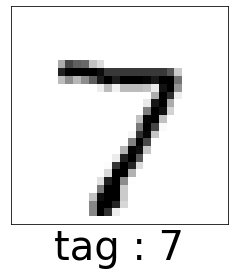

In [59]:
show_num(x_test[0], y_test[0])